# Fashion MNIST Classification using Neural Network and Convolutional Neural Network (CNN)

## Problem statement:

The task of recognizing and classifying clothing items from images is an important problem in the field of computer vision. This problem has many practical applications, such as in e-commerce and retail industries, where it is crucial to accurately identify and categorize different types of clothing items. One well-known dataset for this problem is the Fashion MNIST dataset, which consists of 70,000 grayscale images of 10 different clothing categories, each with 7,000 images. The goal of this project is to develop a models that can accurately classify these clothing items from the given images.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

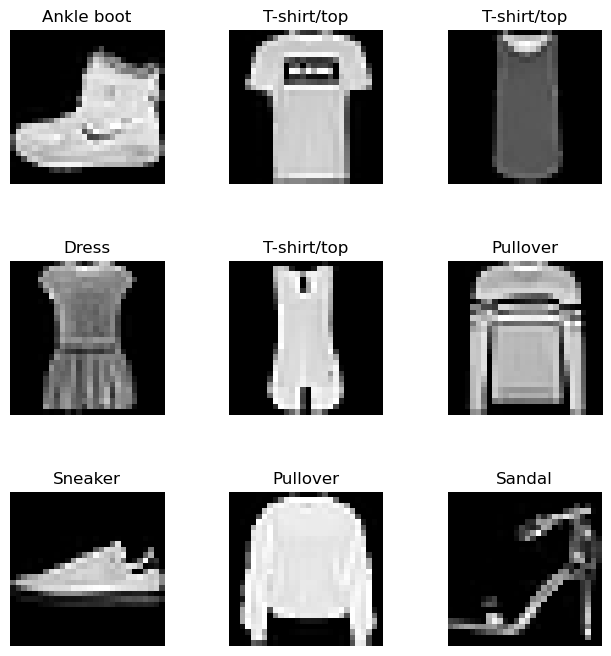

In [4]:
# Visualizing some images

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

# Loop over the first 9 images in the dataset
for i in np.arange(0, 9):
    # Plot the image
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].set_title(class_names[train_labels[i]])
    axes[i].axis('off')

# Display the figure
plt.subplots_adjust(hspace=0.5)
plt.show()

### Data Preparation

In [5]:
# Normalize the image data

train_images = train_images / 255.0
test_images = test_images / 255.0

### Model Building
- Neural Network
- Convolutional Neural Network (CNN)

### Neural Network

In [6]:
# Define the neural network model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4966 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3729 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3382 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3115 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2943 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2813 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2677 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2560 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2471 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

In [7]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Use the model to make predictions on new data
predictions = model.predict(test_images)

# Print the predicted class for the first test image
print('Predicted class:', class_names[np.argmax(predictions[0])])

313/313 [==============================] - 2s 4ms/step - loss: 0.3514 - accuracy: 0.8778
Test accuracy: 0.8777999877929688
Predicted class: Ankle boot


In [9]:
# Predict all test images
y_pred = model.predict(test_images)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print predicted classes for first 10 test images
print('Predicted classes:', y_pred_classes[:10])

Predicted classes: [9 2 1 1 6 1 4 6 5 7]


### Convolutional Neural Network (CNN)

In [11]:
# define the CNN architecture
model = tf.keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [12]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.3968 - accuracy: 0.8554 - val_loss: 0.3392 - val_accuracy: 0.8717
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2609 - accuracy: 0.9047 - val_loss: 0.2723 - val_accuracy: 0.9019
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2174 - accuracy: 0.9204 - val_loss: 0.2474 - val_accuracy: 0.9098
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1858 - accuracy: 0.9309 - val_loss: 0.2454 - val_accuracy: 0.9127
Epoch 5/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.1590 - accuracy: 0.9410 - val_loss: 0.2569 - val_accuracy: 0.9079
Epoch 6/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1323 - accuracy: 0.9511 - val_loss: 0.2548 - val_accuracy: 0.9151
Epoch 7/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1126 - accuracy: 0.9584 - val_loss: 0.2641 -

In [14]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Use the model to make predictions on new data
predictions = model.predict(test_images)

# Print the predicted class for the first test image
print('Predicted class:', class_names[np.argmax(predictions[0])])

313/313 [==============================] - 4s 13ms/step - loss: 0.3257 - accuracy: 0.9168
Test accuracy: 0.9168000221252441
Predicted class: Ankle boot


In [13]:
# Predict all test images
y_pred = model.predict(test_images)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print predicted classes for first 10 test images
print('Predicted classes:', y_pred_classes[:10])

Predicted classes: [9 2 1 1 6 1 4 6 5 7]


## Observations
- CNN takes longer to train.
- CNN is far more accurate in making the preidctions.